In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier

### import the data into the environment

In [2]:
df = pd.read_csv("./HW1_Data.csv")

### Inspecting and understanding the data

In [3]:
# Identify the data size
df.shape

(31891, 12)

In [16]:
# See what's in the dataframe
df.head(10)

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.00,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.00,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.00,27,224,1,0,0,0,0,3,1
5,53.69,15.00,2.33,23,267,1,0,0,0,1,3,1
6,33.66,8.33,0.00,31,933,1,0,0,0,0,2,1
7,52.56,80.00,31.67,33,402,1,0,0,0,1,3,1
8,22.50,8.67,2.67,37,243,1,0,0,0,0,3,1
9,98.47,24.67,3.33,35,13,0,0,1,1,1,3,1


In [17]:
# Reveal the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   31891 non-null  float64
 1   outcalls  31891 non-null  float64
 2   incalls   31891 non-null  float64
 3   months    31891 non-null  int64  
 4   eqpdays   31891 non-null  int64  
 5   webcap    31891 non-null  int64  
 6   marryyes  31891 non-null  int64  
 7   travel    31891 non-null  int64  
 8   pcown     31891 non-null  int64  
 9   creditcd  31891 non-null  int64  
 10  retcalls  31891 non-null  int64  
 11  churndep  31891 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.9 MB


In [18]:
# Count how many null entries for each feature
df.isnull().sum()

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
churndep    0
dtype: int64

In [19]:
# Describe the data for central tendency and other statistical descriptions
df.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
df['churndep'].value_counts()

0    16036
1    15855
Name: churndep, dtype: int64

<AxesSubplot:>

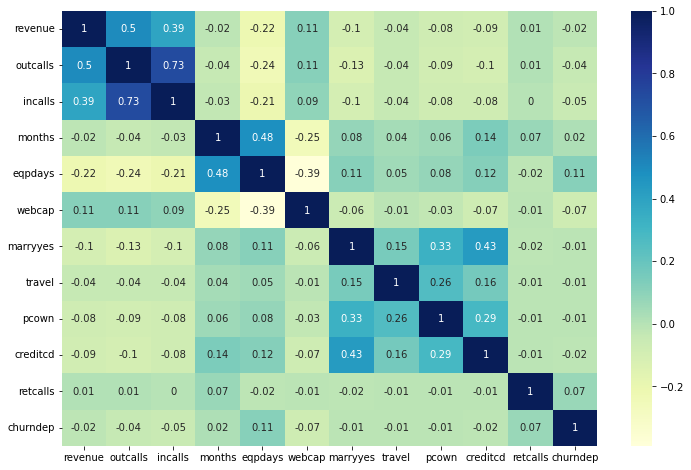

In [21]:
# Confusion Matrix
plt.figure(figsize = (12,8))

p1 = round(df.corr(), 2)

sns.heatmap(p1,cmap="YlGnBu", annot=True)

### Fit the decision tree model

In [5]:
# Define the explanatory(independent) and response(target) variables. 
X = np.array(df[df.columns[:-1]])
y = np.array(df[df.columns[-1]])

In [6]:
# Split the data into the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [7]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=None) # Be aware of default parameters e.g., default criterion is gini
model = tree_clf.fit(X_train, y_train) # Model training/fitting

Decision Tree Visualization


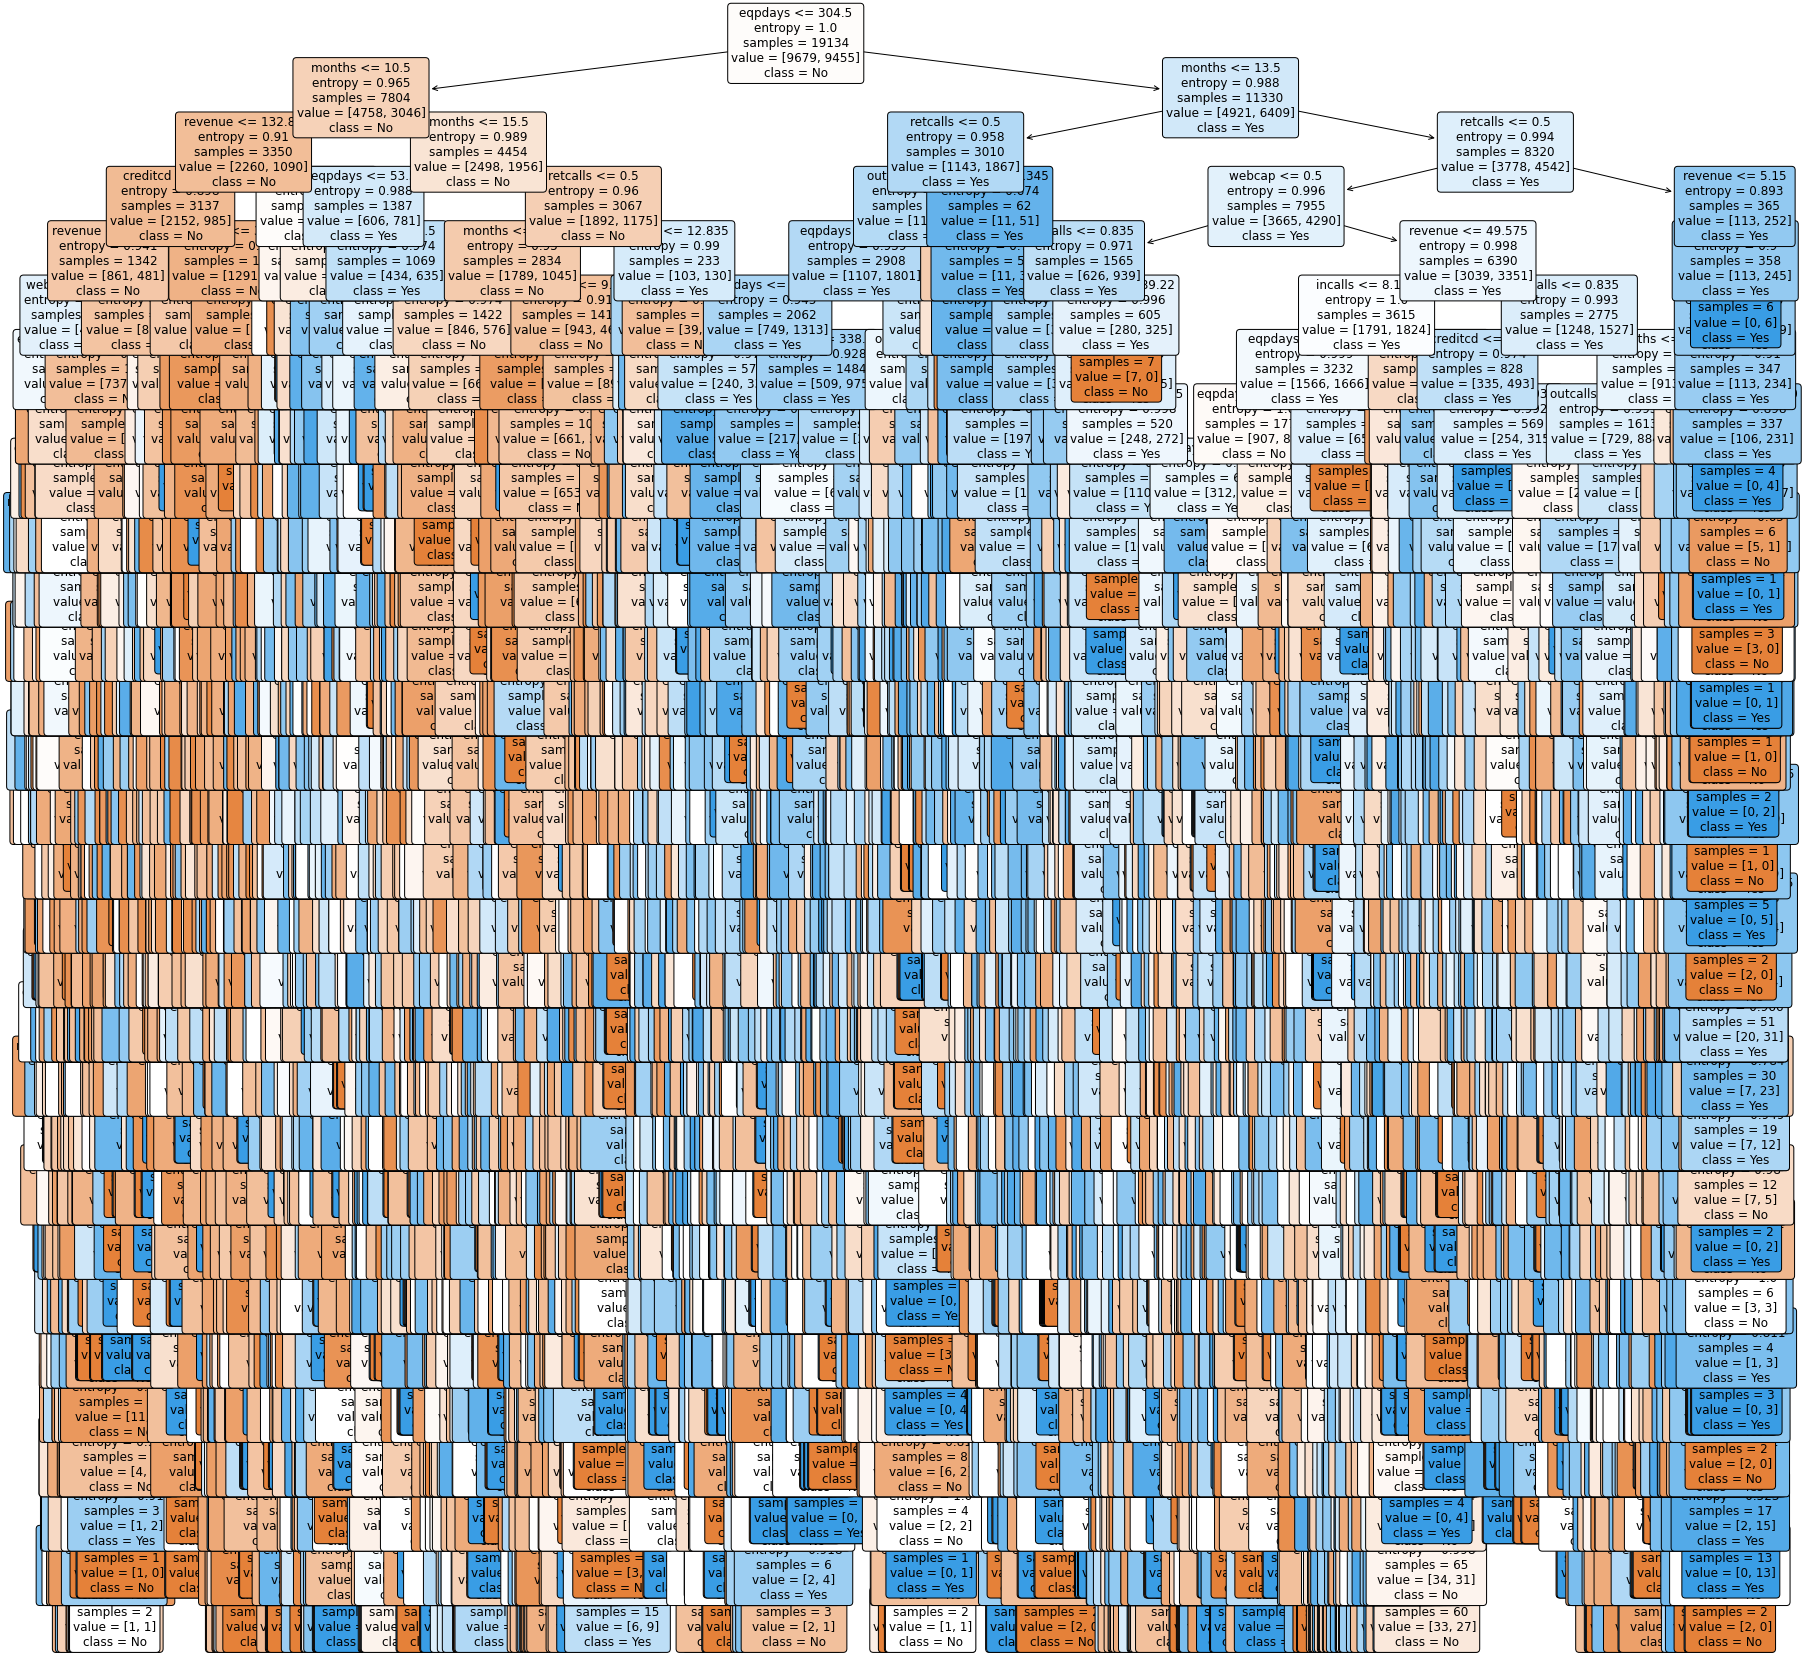

In [22]:
######################################### Visualization of the Decision Tree #########################################
from sklearn import tree

plt.figure(figsize=(30,30)) 

#plot_tree plots a decision tree; see documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
tree.plot_tree(model,                        #The decision tree to be plotted                 
               feature_names = df.columns[:-1],    #Names of each of the features. If None, generic names will be used (“X[0]”, “X[1]”, …).
               filled = True,                             #When set to True, paint nodes to indicate majority class for classification, or purity of node for multi-output.
               class_names = ["No", "Yes"],               #Names of each of the target classes in ascending numerical order.
               rounded = True,                            #When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.   
               fontsize=12)                               #Size of text font. If None, determined automatically to fit figure.
print('Decision Tree Visualization')

In [41]:
# Make prediction with the model to assess its performance
y_pred = model.predict(X_test)
accuracy = sum(y_pred==y_test)/len(y_test)
print(f"The model accuracy is: {accuracy}")

The model accuracy is: 0.5353139452849416


In [40]:
#added the classification report to check other evaluation parameters
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      6357
           1       0.54      0.53      0.53      6400

    accuracy                           0.54     12757
   macro avg       0.54      0.54      0.54     12757
weighted avg       0.54      0.54      0.54     12757



### Exploring Decision Tree's Performance

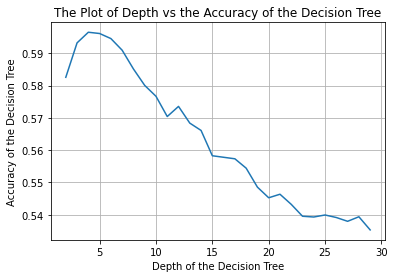

In [25]:
# Trying different depths of the tree to find the best depths that yield to the best predictive accuracy
accuracy = []
for i in range(2,30):
    tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=42) # Be aware of default parameters e.g., default criterion is gini
    model = tree_clf.fit(X_train, y_train)
    # Make prediction with the model to assess its performance
    y_pred = model.predict(X_test)
    accuracy.append(sum(y_pred==y_test)/len(y_test))
    
plt.plot(range(2,30), accuracy)
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy of the Decision Tree")
plt.title("The Plot of Depth vs the Accuracy of the Decision Tree")
plt.grid()

## Working with standardized data.

In the following lines of codes, we explore the effect of standardizing the data on the decision tree. We compare the preformance of the decision tree for both standardized and non-standardized data.

In [26]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [28]:
print(y_train)

[1 1 0 ... 1 1 0]


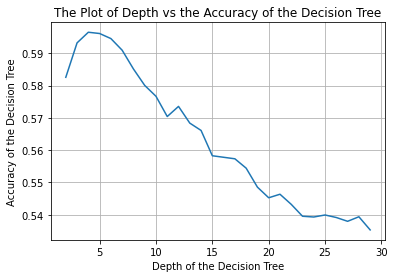

In [29]:
# Trying different depths for the standardized data
accuracy = []
for i in range(2,30):
    tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=42) # Be aware of default parameters e.g., default criterion is gini
    model = tree_clf.fit(X_train, y_train)
    # Make prediction with the model to assess its performance
    y_pred = model.predict(X_test)
    accuracy.append(sum(y_pred==y_test)/len(y_test))
    
plt.plot(range(2,30), accuracy)
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy of the Decision Tree")
plt.title("The Plot of Depth vs the Accuracy of the Decision Tree")
plt.grid()

## Model Hyperparameters Tuning
Below we tune the hyperparameters and find the optimal parameters that gives the best performance metrics. To do this, we use Grid Search Cross Validation. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
# Define the helper functions for metrics and performance plots

def cv_grid_search(training_table, training_labels):
    """ Run grid search with cross-validation to try different
    hyperparameters
        Arguments:
            Training data dataframe and training labels
        Returns:
            Dictionary of best hyperparameters found by a grid search with
            cross-validation
    """
    
    parameters = {'criterion':('gini','entropy'), 'max_depth':[1, 2, 3, 4, 5, 10],'class_weight':['balanced']}
    model = tree.DecisionTreeClassifier()
    clf = GridSearchCV(model, parameters)
    clf.fit(training_table, training_labels)
    GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
    
    return clf.best_params_ #sorted(clf.cv_results_.keys())
    


def plot_confusion_matrix(test_labels, pred_labels, normalize = False, title = 'Confusion Matrix'):
    """Plot confusion matrix
        Arguments:
            ground truth labels and predicted labels
        Returns:
            Writes image file of confusion matrix
    """
    y_test = test_labels
    y_pred = pred_labels
    labs = [0, 1]
    cm = confusion_matrix(y_test,y_pred, labels=labs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labs)
    disp.plot(include_values=True) 
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')

def graph_tree(model, training_features, class_names):
    """ Plot the tree of the trained model
        Arguments:
            Trained model, list of features, class names
        Returns:
            Writes PDF file showing decision tree representation
    """
    fn = training_features
    cn = class_names
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (60,15), dpi=300)
    tree.plot_tree(model,
                   feature_names = fn, 
                   class_names=cn, filled = True, fontsize=7);
    
    plt.rcParams.update({'font.size': 20})
    plt.title('The Decision Tree Classifier')
    # Save the decision tree as to jpg image
    fig.savefig('Tree.jpg')
    # export the decision tree to pdf file
    with PdfPages('Tree.pdf') as pdf:
        pdf.savefig(fig)

def print_metrics(predictions, test_y):
    """Print results
        Arguments:
            Ground truth labels and predicted labels
        Returns:
            Prints precision, recall, F1-score, and accuracy
    """
    print("\n The preformance metrics are:\n ====================================")
    print(classification_report(predictions, test_y))


def print_feature_importance(model, features):
    """Print feature importance
        Arguments:
            Trained model and list of features
        Returns:
            Prints ordered list of features, starting with most important,
            along with their relative importance (percentage).
    """
    importances_dictionary = dict(zip(features, model.feature_importances_))
    feat_importances = dict(sorted(importances_dictionary.items(), key=lambda item: item[1], reverse = True))
    print("\n THE FEATURE IMPORTANCES")
    print(" =======================")
    print(feat_importances)

In [32]:
def main():
    """Run the program"""
    # Load data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Cross Validation Training
    params = cv_grid_search(X_train, y_train)
    # params = ['gini', 5, 'balanced']
    [a, b, c] = list(params.values())
    model = tree.DecisionTreeClassifier(class_weight= a, criterion= b, max_depth = c)
    model.fit(X_train, y_train)
    # Train and test model using hyperparameters
    print("The optimal hyperparameters are [class_weight, criterion, max_depth] = ", [a, b, c])
    # TODO: Finish this function

    # Confusion Matrix
    y_pred = model.predict(X_test)
    
    # Print non normalized confusion matrix
    plot_confusion_matrix(list(y_test), 
                          list(y_pred),
                          title = 'Confusion Matrix of the Classifier')

    # Print normalized confusion matrix
    plot_confusion_matrix(list(y_test), 
                          list(y_pred), 
                          normalize=True,
                          title = 'Normalized Confusion Matrix of the Classifier')

    # Graph Tree
    graph_tree(model, df.columns[:-1], ['No', 'Yes'])

    # Accuracy, Precision, Recall, F1
    print_metrics(predictions=y_pred, test_y=y_test)

    # Feature Importance
    print_feature_importance(model=model, features=df.columns[:-1])

The optimal hyperparameters are [class_weight, criterion, max_depth] =  ['balanced', 'gini', 5]

 The preformance metrics are:
              precision    recall  f1-score   support

           0       0.45      0.64      0.53      3385
           1       0.74      0.58      0.65      6183

    accuracy                           0.60      9568
   macro avg       0.60      0.61      0.59      9568
weighted avg       0.64      0.60      0.61      9568


 THE FEATURE IMPORTANCES
{'eqpdays': 0.5097375870225744, 'months': 0.2775153561372954, 'revenue': 0.057240977527575725, 'retcalls': 0.056330840021886194, 'incalls': 0.030438734511833695, 'webcap': 0.027901733296184502, 'outcalls': 0.02430599400263255, 'creditcd': 0.016528777480017586, 'marryyes': 0.0, 'travel': 0.0, 'pcown': 0.0}


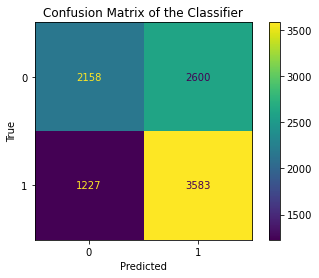

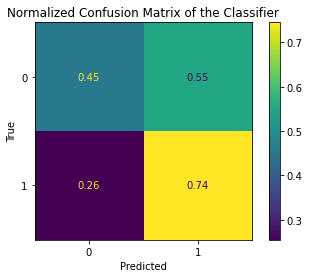

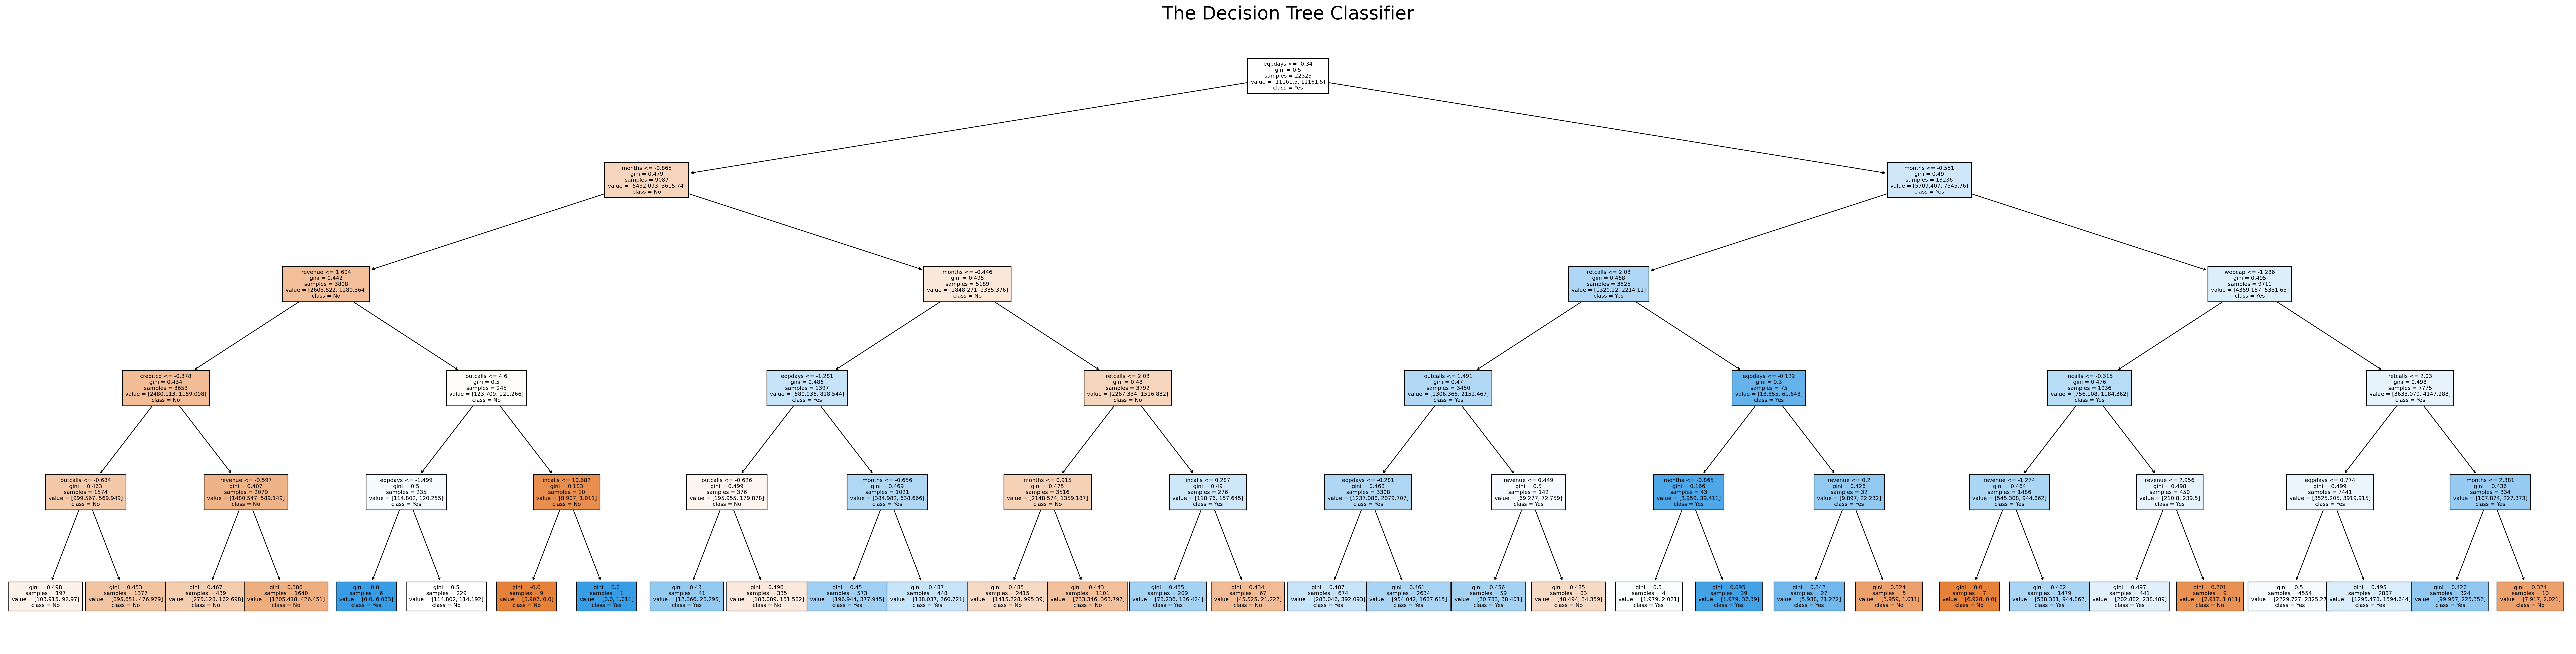

In [33]:
if __name__ == '__main__':
    main()

## Criterion Selection: Gini vs Entropy

In the next snippets we train the the decision tree using different criteria and compare their performance metrics.


In [34]:
# Decision tree with entropy criterion
entropy_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, class_weight='balanced')
entropy_based_tree = entropy_tree.fit(X_train, y_train)
y_pred_with_entropy = entropy_based_tree.predict(X_test)

# Decision tree with gini ratio criterion
gini_tree = DecisionTreeClassifier(criterion="gini", max_depth=5, class_weight='balanced')
gini_based_tree = gini_tree.fit(X_train, y_train)
y_pred_with_gini = gini_based_tree.predict(X_test)

<Figure size 432x288 with 0 Axes>

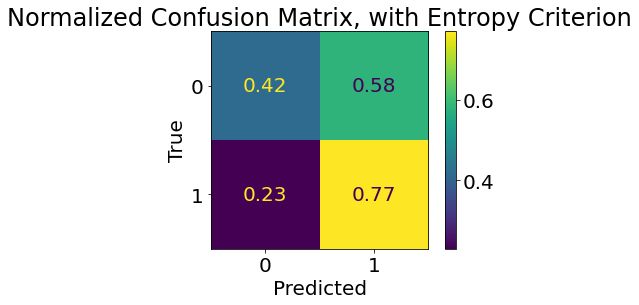

<Figure size 432x288 with 0 Axes>

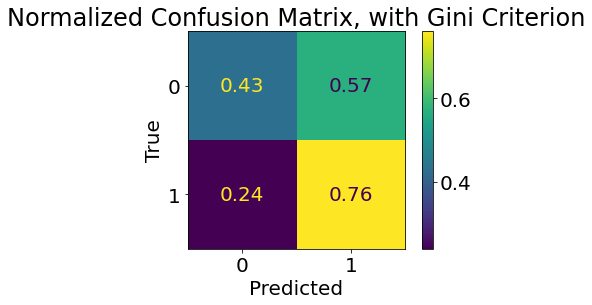

In [35]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, 
                      y_pred_with_entropy, 
                      normalize=True,
                      title='Normalized Confusion Matrix, with Entropy Criterion')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, 
                      y_pred_with_gini,
                      normalize=True,
                      title='Normalized Confusion Matrix, with Gini Criterion')

plt.show()                    

In [36]:
# Print the other metrics for entropy-based predictions
print("THE RESULTS FOR ENTROPY:")
print("========================")
print(classification_report(y_pred_with_entropy, y_test))

# Print the other metrics for gini-based predictions
print()
print("THE RESULTS FOR GINI:")
print("=====================")
print(classification_report(y_pred_with_gini, y_test))

THE RESULTS FOR ENTROPY:
              precision    recall  f1-score   support

           0       0.42      0.64      0.51      4146
           1       0.77      0.57      0.66      8611

    accuracy                           0.59     12757
   macro avg       0.59      0.61      0.58     12757
weighted avg       0.66      0.59      0.61     12757


THE RESULTS FOR GINI:
              precision    recall  f1-score   support

           0       0.43      0.64      0.51      4259
           1       0.76      0.57      0.65      8498

    accuracy                           0.60     12757
   macro avg       0.60      0.61      0.58     12757
weighted avg       0.65      0.60      0.61     12757



The results from Gini and Entropy are pretty close but Gini criterion yields a little better score.